In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [4]:
df['Year'] = df['Day'].astype(str).str.slice(0, 4)
y_grouped = df.groupby('Year').mean()

mean_temps = df.groupby(by='Year').t.mean()
y_min = mean_temps[mean_temps == mean_temps.min()].index[0]
y_max = mean_temps[mean_temps == mean_temps.max()].index[0]

print(y_min)
print(y_max)

2012
2015


C:\Users\ber_v\AppData\Local\Temp\ipykernel_18288\824603323.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y_grouped = df.groupby('Year').mean()


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [6]:
df['Month'] = df['Day'].astype(str).str.slice(5, 7).astype(int)

jan = df[(df.Month == 1) & (df.t >= 0)].groupby(by='Year').t.count()
y_max_jan = jan[jan == jan.max()].index[0]

print(y_max_jan)

2008


**3.** В каком году было самое холодное лето (по средней температуре)

In [7]:
df['Month'] = df['Day'].astype(str).str.slice(5, 7).astype(int)

summ = df[(df.Month >= 6) & (df.Month <= 8)].groupby(by='Year').t.mean()
y_min_summ = summ[summ == summ.min()].index[0]

print(y_min_summ)

2008


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [8]:
df['delta'] = abs(df.t - df.t.shift(-1))
y_max_delta = df[df.delta == df.delta.max()].Day.values[0]

print(y_max_delta)

2014-05-26T00:00:00.000000000


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

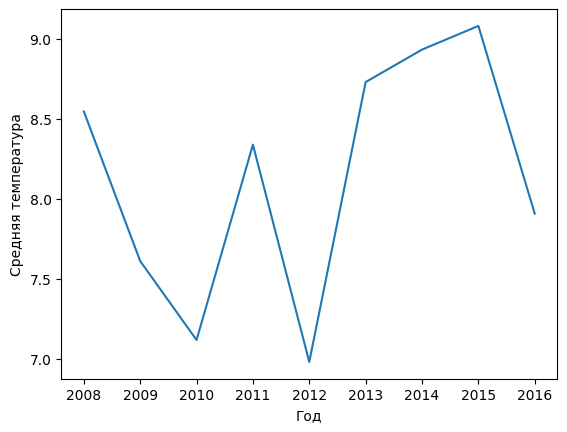

In [9]:
mean_temps.plot()
plt.xlabel('Год')
plt.ylabel('Средняя температура')
plt.show()